In this notebook, we run and compare results from the analytical solution and our reinforcement learning solution. Our functions are all inside of molcontrol.py, which we import and use.

The reinforcement learning algorithm took  110.18012356758118  while the theoretical solution took  0.15989470481872559


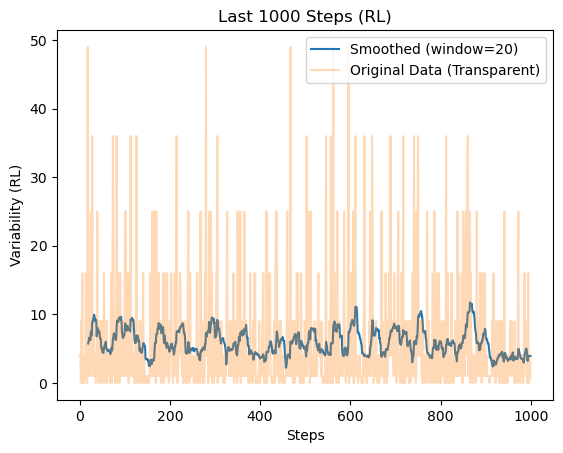

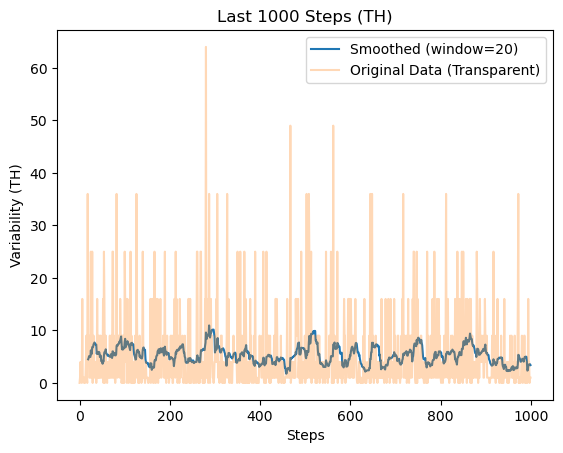

The average variability over the last 10000 observations was (rl)  5.6969
The average variability over the last 5000 observations was (rl)  5.9182
The average variability over the last 10000 observations was (th)  5.0121
The average variability over the last 5000 observations was (th)  5.2022


In [8]:
import molcontrol

steps = 10000
target = 20
molecule_lifetime = 1.0
dt = 0.5
history_length = 1
observable_indices = 0

RUN_SEED = 0
batch_size = 200

# Start the timer
start_time = time.time()

train_steps = 20000
model = molcontrol.NeuralNetwork(input_dim = 1)
learning_rate = 1e-3
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
replay_memory = ReplayMemory(capacity=2000)

molcontrol.train_molecule_controller(model, optimizer, loss_fn, replay_memory, train_steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED, batch_size)
rewards_rl, training_error = molcontrol.test_molecule_controller(model, optimizer, loss_fn, replay_memory, steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED, batch_size)
end_time = time.time()
rl_time = end_time - start_time

start_time = time.time()
rewards_th = molcontrol.optimal_solution(steps, target, molecule_lifetime, dt, RUN_SEED = 0)
end_time = time.time()
th_time = end_time - start_time

print ("The reinforcement learning algorithm took ", rl_time, " while the theoretical solution took ", th_time)

molcontrol.plot_with_smoothing(-rewards_rl[-1000:], 'Steps', 'Variability (RL)', 'Last 1000 Steps (RL)', smoothing_window=20)
molcontrol.plot_with_smoothing(-rewards_th[-1000:], 'Steps', 'Variability (TH)', 'Last 1000 Steps (TH)', smoothing_window=20)

print ("The average variability over the last 10000 observations was (rl) ", molcontrol.end_average(-rewards_rl, 10000))
print ("The average variability over the last 5000 observations was (rl) ", molcontrol.end_average(-rewards_rl, 5000))

print ("The average variability over the last 10000 observations was (th) ", molcontrol.end_average(-rewards_th, 10000))
print ("The average variability over the last 5000 observations was (th) ", molcontrol.end_average(-rewards_th, 5000))

We find that despite training for a long time, our reinforcement learning algorithm is significantly worse than the theoretical best algorithm even for such a simple controller. We can try to increase the training duration

The reinforcement learning algorithm took  817.9338216781616  while the theoretical solution took  0.16011309623718262


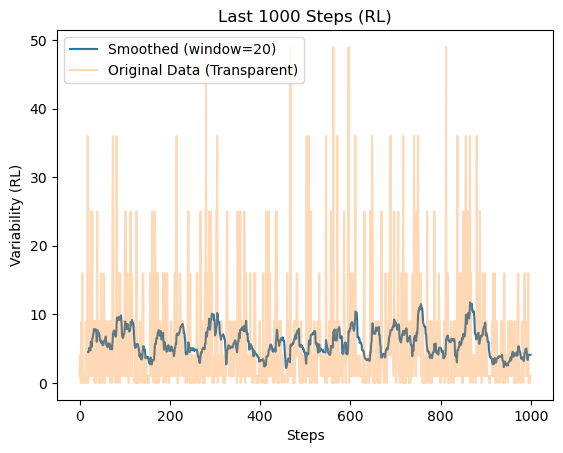

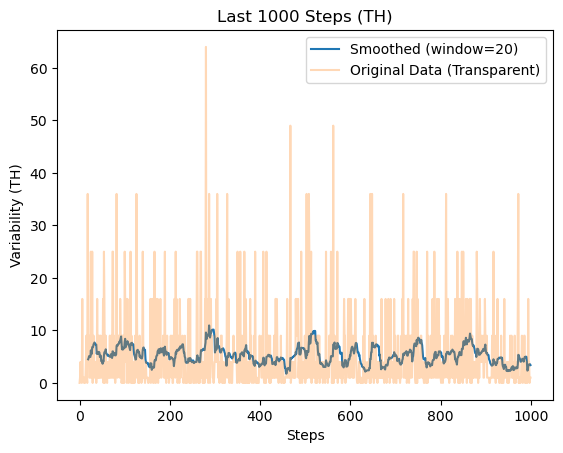

The average variability over the last 10000 observations was (rl)  5.6909
The average variability over the last 5000 observations was (rl)  5.8962
The average variability over the last 10000 observations was (th)  5.0121
The average variability over the last 5000 observations was (th)  5.2022


In [5]:
steps = 10000
target = 20
molecule_lifetime = 1.0
dt = 0.5
history_length = 1
observable_indices = 0

RUN_SEED = 0
batch_size = 200

# Start the timer
start_time = time.time()

train_steps = 200000
model = NeuralNetwork(input_dim = 1)
learning_rate = 1e-3
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
replay_memory = ReplayMemory(capacity=2000)

train_molecule_controller(model, optimizer, loss_fn, replay_memory, train_steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED, batch_size)
rewards_rl, training_error = test_molecule_controller(model, optimizer, loss_fn, replay_memory, steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED, batch_size)
end_time = time.time()
rl_time = end_time - start_time

start_time = time.time()
rewards_th = optimal_solution(steps, target, molecule_lifetime, dt, RUN_SEED = 0)
end_time = time.time()
th_time = end_time - start_time

print ("The reinforcement learning algorithm took ", rl_time, " while the theoretical solution took ", th_time)

plot_with_smoothing(-rewards_rl[-1000:], 'Steps', 'Variability (RL)', 'Last 1000 Steps (RL)', smoothing_window=20)
plot_with_smoothing(-rewards_th[-1000:], 'Steps', 'Variability (TH)', 'Last 1000 Steps (TH)', smoothing_window=20)

print ("The average variability over the last 10000 observations was (rl) ", end_average(-rewards_rl, 10000))
print ("The average variability over the last 5000 observations was (rl) ", end_average(-rewards_rl, 5000))

print ("The average variability over the last 10000 observations was (th) ", end_average(-rewards_th, 10000))
print ("The average variability over the last 5000 observations was (th) ", end_average(-rewards_th, 5000))

But we find no improvement. We can more directly evaluate our training performance by comparing it's predictions for a list of molecule numbers with the analytic solutions, as follows

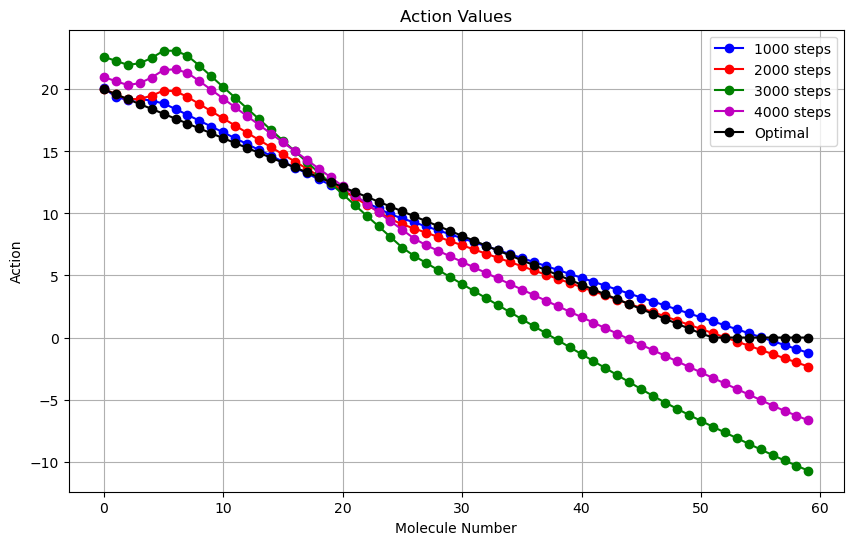

In [6]:
import molcontrol
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torch import nn
from torch.optim import Adam

steps = 10000
target = 20
molecule_lifetime = 1.0
dt = 0.5
history_length = 1
observable_indices = 0

RUN_SEED = 0
batch_size = 200

train_steps = 1000
model = molcontrol.NeuralNetwork(input_dim = 1)
learning_rate = 1e-3
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
replay_memory = molcontrol.ReplayMemory(capacity=2000)

upper_mol = target*3

molcontrol.train_molecule_controller(model, optimizer, loss_fn, replay_memory, train_steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED, batch_size)
action_val1 = molcontrol.control_plot_1d(model, upper_mol, molecule_lifetime, dt)

molcontrol.train_molecule_controller(model, optimizer, loss_fn, replay_memory, train_steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED, batch_size)
action_val2 = molcontrol.control_plot_1d(model, upper_mol, molecule_lifetime, dt)

molcontrol.train_molecule_controller(model, optimizer, loss_fn, replay_memory, train_steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED, batch_size)
action_val3 = molcontrol.control_plot_1d(model, upper_mol, molecule_lifetime, dt)

molcontrol.train_molecule_controller(model, optimizer, loss_fn, replay_memory, train_steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED, batch_size)
action_val4 = molcontrol.control_plot_1d(model, upper_mol, molecule_lifetime, dt)

action_vals_th = molcontrol.control_plot_1dopt(upper_mol, target, molecule_lifetime, dt)

plt.figure(figsize=(10, 6))
plt.plot(action_val1, marker='o', linestyle='-', color='b', label = '1000 steps')
plt.plot(action_val2, marker='o', linestyle='-', color='r', label = '2000 steps')
plt.plot(action_val3, marker='o', linestyle='-', color='g', label = '3000 steps')
plt.plot(action_val4, marker='o', linestyle='-', color='m', label = '4000 steps')

plt.plot(action_vals_th, marker='o', linestyle='-', color='k', label = 'Optimal')
plt.legend(loc = 'best')
plt.title("Action Values")
plt.xlabel("Molecule Number")
plt.ylabel("Action")
plt.grid(True)
plt.show()